In [21]:
import netCDF4     
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
plt.rcParams['figure.figsize'] = 15,8

#read grid paramenters
grid_Small=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')

#lon and lat to np array
lon=np.array(grid_Small.variables['LON'][0,0,:,:])
lat=np.array(grid_Small.variables['LAT'][0,0,:,:])
dic_coef={'BAP':1,'PM25':1,'PM10':1,'NO2':1.912,'NO':1.24,'O3':2,'SO2':2.66,'CO':1.160}

In [3]:
pollutants=['BAP','CO','NO','NO2','O3','PM','SO2']
dic_small={}
for i in pollutants:
    if i == 'PM':
       dic_small['PM25']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_small_PM').variables['PM25']),axis=0)[0,:,:]*dic_coef['PM25']
       dic_small['PM10']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_small_PM').variables['PM10']),axis=0)[0,:,:]*dic_coef['PM10']
    else:
       dic_small[i]=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_small_{0}'.format(i)).variables[i]),axis=0)[0,:,:]*dic_coef[i] 


In [4]:
dic_nevnor={}
for i in pollutants:
    if i == 'PM':
       dic_nevnor['PM25']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_nevnor_PM').variables['PM25']),axis=0)[0,:,:]*dic_coef['PM25']
       dic_nevnor['PM10']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_nevnor_PM').variables['PM10']),axis=0)[0,:,:]*dic_coef['PM10']
    else:
       dic_nevnor[i]=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_nevnor_{0}'.format(i)).variables[i]),axis=0)[0,:,:]*dic_coef[i] 


In [18]:
for i in dic_nevnor.keys():
    print(i) 
    print('max deviation',np.abs(dic_nevnor[i]-dic_small[i]).max(),'micrograms')
    print('average deviation',np.average(np.abs(dic_nevnor[i]-dic_small[i])),'micrograms')

BAP
max deviation 0.00016810471 micgrams
average deviation 4.3630216e-06 micgrams
CO
max deviation 0.18025208 micgrams
average deviation 0.01964688 micgrams
NO
max deviation 0.068323135 micgrams
average deviation 0.0024872036 micgrams
NO2
max deviation 0.11971855 micgrams
average deviation 0.060745187 micgrams
O3
max deviation 0.25450897 micgrams
average deviation 0.12722996 micgrams
PM25
max deviation 4.216219 micgrams
average deviation 1.9186035 micgrams
PM10
max deviation 4.2348394 micgrams
average deviation 1.9317478 micgrams
SO2
max deviation 0.24912477 micgrams
average deviation 0.057024825 micgrams


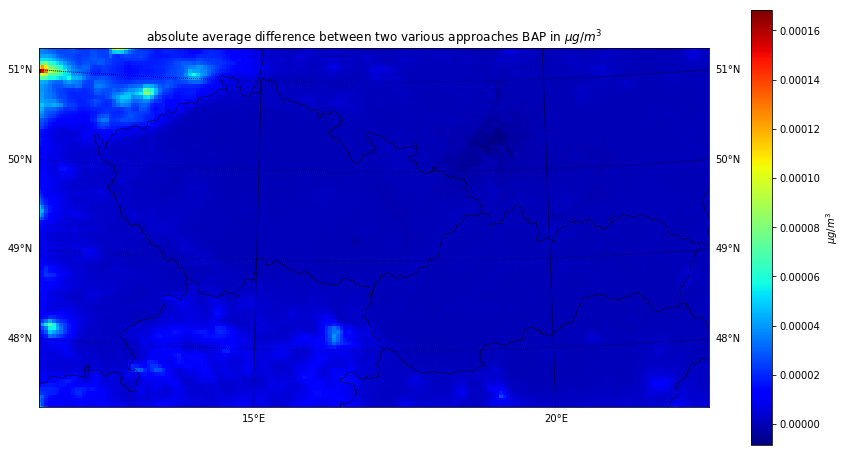

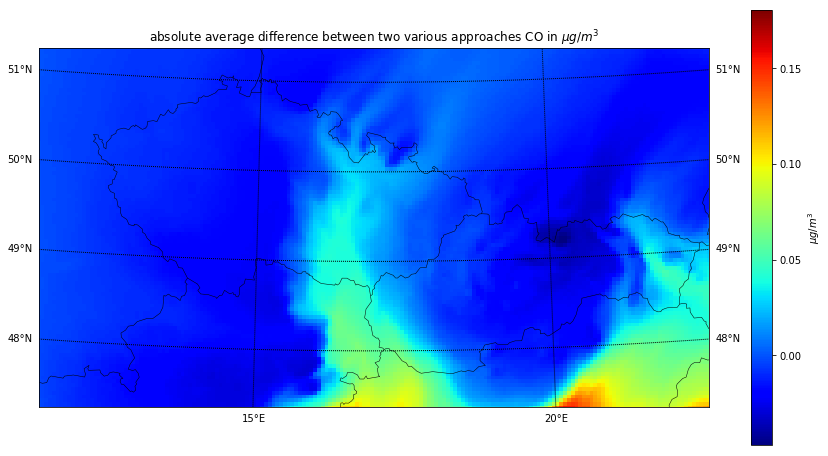

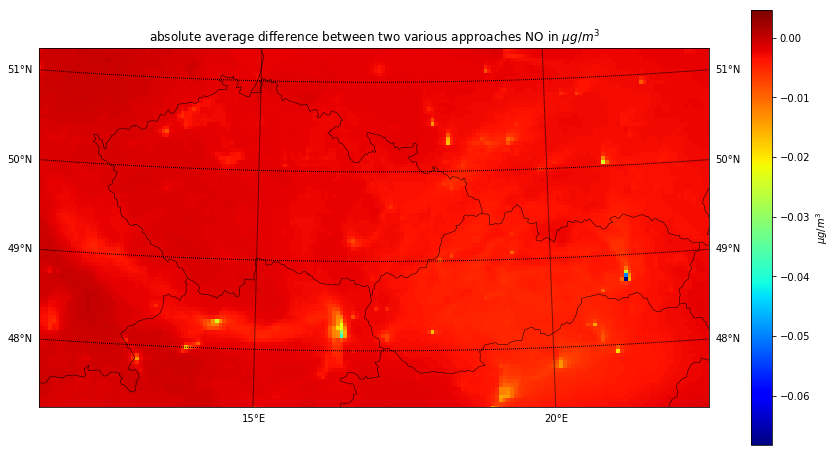

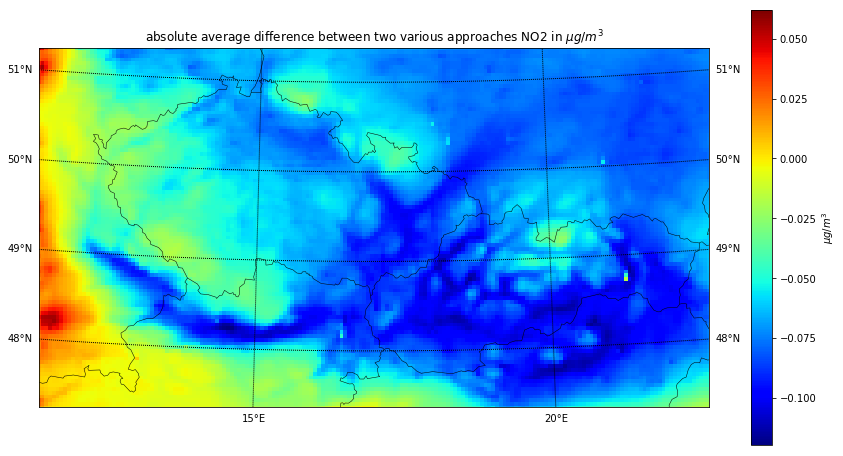

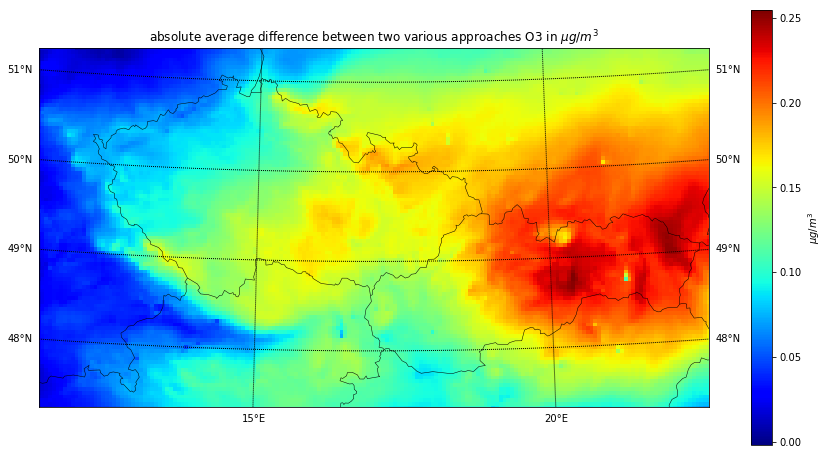

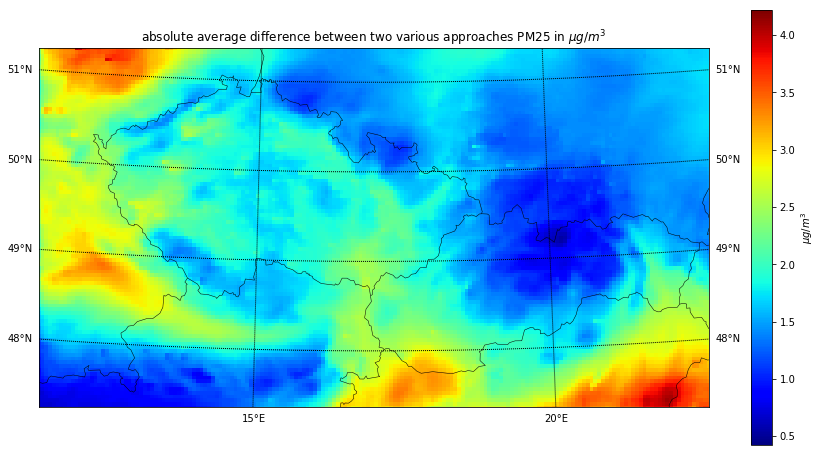

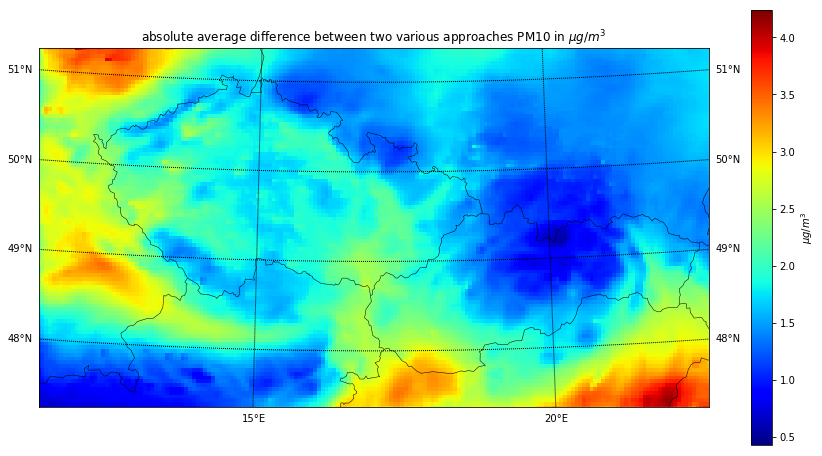

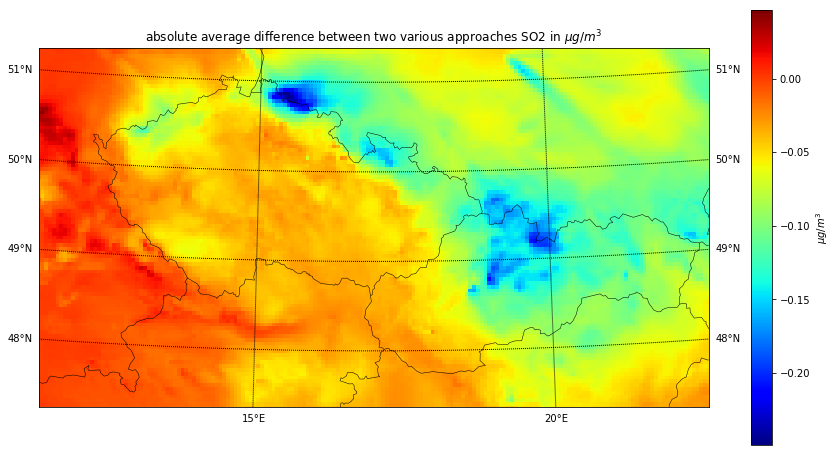

In [34]:
meridians = np.arange(10.,35.,5.)
pararels = np.arange(45.,52.,1.)
levels=[0,0.1,0.5,1,2,4]

for i in dic_nevnor.keys():

    mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=833000,height=446351,resolution='i')
    mapb.drawcountries()
    mapb.drawmeridians(meridians,labels=[False,True,False, True, False])
    mapb.drawparallels(pararels,labels=[True,True,True, True,True,True])

    # choose one of the two style of the plot
    mapb.pcolormesh(lon,lat,dic_nevnor[i]-dic_small[i],cmap=plt.cm.jet,latlon=True) 
    #mapb.contourf(lon,lat,np.abs(dic_nevnor[i]-dic_small[i]),levels,cmap=plt.cm.jet,latlon=True) 
    

    plt.colorbar(label='$\mu g /m^3$')
    plt.title('absolute average difference between two various approaches {0} in $\mu g /m^3$'.format(i))
    plt.show()
    plt.close()